# Código para Hacer las Predicciones utilizando ARIMA

In [126]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandas.plotting import autocorrelation_plot
import pmdarima as pm
from pmdarima.arima.utils import ndiffs
import random

os.getcwd()


Wall time: 0 ns


'C:\\Users\\marin\\Documents\\Controlador PID\\Bases'

In [127]:
%%time
#Tomar datos que son desde el 2018
BM  = pd.read_csv('BM.csv')
BM["Fecha"]=pd.to_datetime(BM.Fecha)
BM['Semana'] = pd.to_datetime(BM.Fecha.dt.week.astype(str)+BM.Fecha.dt.year.astype(str).add('-1') ,format='%V%G-%u')
BM = BM[BM["Semana"]>="2018-10-01"]
BM["Entrada_Salida"]  = pd.to_numeric(BM["Entrada_Salida"], errors="coerce")
BM= BM[BM["Entrada_Salida"]==1]

<string>:2: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 13.8 s


In [128]:
#Numero de semanas desde el 1ero de enero del 2018

semanas=len(BM.groupby("Semana").count())
BM.groupby("Semana").count()

,IdCaptura,IdArticulo,Fecha,Cantidad,Existencia,CostoCompra,Costo,PrecioCompra,Precio,Total,IdTipo,Entrada_Salida
Semana,,,,,,,,,,,,
2018-10-01,11392,11392,11392,11392,11392,11392,11392,11392,11392,11392,11392,11392
2018-10-08,11695,11695,11695,11695,11695,11695,11695,11695,11695,11695,11695,11695
2018-10-15,12585,12585,12585,12585,12585,12585,12585,12585,12585,12585,12585,12585
2018-10-22,10789,10789,10789,10789,10789,10789,10789,10789,10789,10789,10789,10789
2018-10-29,9219,9219,9219,9219,9219,9219,9219,9219,9219,9219,9219,9219
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-07,9965,9965,9965,9965,9965,9965,9965,9965,9965,9965,9965,9965
2020-09-14,9836,9836,9836,9836,9836,9836,9836,9836,9836,9836,9836,9836
2020-09-21,10387,10387,10387,10387,10387,10387,10387,10387,10387,10387,10387,10387


In [129]:
%%time
#Lista de todos los articulos
lista=BM[["IdArticulo", "Cantidad"]].groupby("IdArticulo").sum().sort_values("Cantidad", ascending=False).reset_index()["IdArticulo"].values;
len(lista)

Wall time: 35.2 ms


3805

### Tomar los articulos que se han pedido de manera ininterrumpida durante todas las semanas desde el 2018

In [130]:
%%time
#Tomar los articulos que se han pedido de manera ininterrumpida durante todas las semanas desde el 2018
prueba=BM[["Semana", "IdArticulo"]]

IdArticulo=[]
hola=[]

for i in lista:
    siempre=len(prueba[prueba["IdArticulo"]==i].groupby("Semana").count())
    hola.append(siempre)
    IdArticulo.append(i)
d={"IdArticulo":IdArticulo, "Siempre":hola}
df=pd.DataFrame(data=d)
lista_ininterrumpidos=df[df["Siempre"]==semanas].IdArticulo.values

Wall time: 7.52 s


### Lista de Medicamentos

In [131]:
rango=len(lista_ininterrumpidos)
print(rango)
lista_ininterrumpidos

82


array([3600021., 3301668., 3800068., 3800067., 3800069., 1000307.,
       3400007., 1000077., 3800064., 1000060., 3800065., 3800051.,
       3600143., 3600092., 1000097., 1000069., 1000210., 1000124.,
       3304813., 3800035., 3600146., 1000063., 1000082., 3800066.,
       1000209., 3800075., 3600085., 1000051., 1000182., 1000243.,
       1000056., 3400132., 3800012., 3600103., 1000235., 3600024.,
       3600207., 3301002., 3301737., 1000187., 3600071., 3600039.,
       3800013., 3305060., 1000177., 3600073., 1000123., 1000259.,
       3600164., 1000278., 1000341., 1000204., 3301257., 3400053.,
       1000072., 3302785., 1000193., 3600050., 1000054., 3400137.,
       3305090., 3305061.,  700043.,  700024., 1000215., 1000053.,
       3800016., 3600023., 1000070., 3305105., 1000189., 1000191.,
       3800015., 1000119., 3800014., 3800022., 3500322., 1000031.,
       3304560., 3302422., 3302073., 3301924.])

Medicamento: 1000119.0
Wall time: 30.6 ms


Text(0.5, 1.0, '1000119.0')

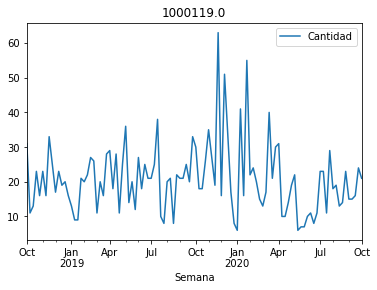

In [132]:
%%time
#Tomar de manera aleatoria un medicamento de la lista de ininterrumpidos

i= random.randint(0,rango-1)

Medicamento = BM[BM["IdArticulo"]== lista_ininterrumpidos[i]]
SerieTiempo = Medicamento[["Semana", "Cantidad"]].groupby("Semana").sum() ; 
print("Medicamento:",lista_ininterrumpidos[i])

SerieTiempo.plot()
plt.title(str(lista_ininterrumpidos[i]))

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=1057.362, Time=5.95 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1065.109, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1061.714, Time=3.28 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=1061.819, Time=1.85 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=1269.324, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=1055.384, Time=0.10 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=1057.477, Time=6.07 sec
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=inf, Time=7.24 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=1060.406, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=1060.157, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=1057.601, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[52] intercept   : AIC=1057.251, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[52] intercept   : AIC=1062.374, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=1061.722, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[52]

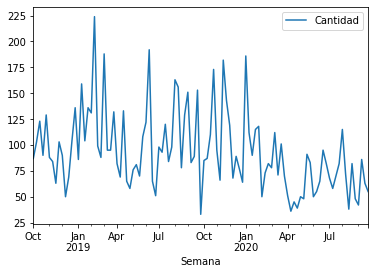

In [134]:
%%time
#Crear la Serie de tiempo para un articulo en específico
i= random.randint(0,rango-1)

#El valor de prueba es el valor a predecir.

Medicamento = BM[BM["IdArticulo"]== lista_ininterrumpidos[i]]
SerieTiempo = Medicamento[["Semana", "Cantidad"]].groupby("Semana").sum()

Prueba      = SerieTiempo[-1:];
SerieTiempo = SerieTiempo[0:-1]

#Crear el vector a pronosticar
x=pm.c(SerieTiempo.Cantidad)

# Estimar las veces a diferenciar la serie en cuestion con el ADF Test:
n_adf = ndiffs(x, test='adf')  # -> 0

#Estimar el número de diferenciación "seasonal"
seasonal= pm.arima.nsdiffs(x, m=52, test='ocsb')

#Calcular el ARIMA
modl = pm.auto_arima(x, start_p=1, start_q=1,start_Q=1,
                             max_p=3, max_q=3, m=52,
                             start_P=0, seasonal=True,
                             d=n_adf, D=seasonal, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=1, return_conf_int=True)


SerieTiempo.plot()
print("Medicamento:",lista_ininterrumpidos[i])
print("Predicción:",preds[0].round())
print("Semana:", )
# Porcentaje de error
print("Cantidad de Error:",(Prueba["Cantidad"][0] - preds[0]) )

In [103]:
# Porcentaje de error
((Prueba["Cantidad"][0] - preds[0]) / Prueba["Cantidad"][0]) *100

-8.370622089432574

In [51]:
lista_ininterrumpidos

array([3600021., 3301668., 3800068., 3800067., 3800069., 1000307.,
       3400007., 1000077., 3800064., 1000060., 3800065., 3800051.,
       3600143., 3600092., 1000097., 1000069., 1000124., 1000210.,
       3304813., 3800035., 3600146., 1000063., 1000082., 3800066.,
       3305053., 1000209., 3800075., 3600085., 1000182., 1000243.,
       3800077., 1000056., 1000051., 3800012., 3400132., 3600103.,
       1000235., 3600024., 3600207., 3301002., 3600071., 3600039.,
       1000187., 3305060., 3600073., 3301737., 3800013., 1000177.,
       1000123., 1000278., 1000259., 3600164., 1000341., 3400053.,
       1000204., 3301257., 1000072., 3302785., 1000193., 3600050.,
        700043., 3400137.,  700024., 1000054.,  800326., 3305090.,
       1000215., 1000053., 1000070., 3600023., 3800016., 3305105.,
       1000191., 3800014., 1000119., 1000189., 3800011., 3800022.,
       3800015., 3500322., 1000031., 3302422., 3302073.])

In [144]:
%%time

#Loop para hacer predicciones con AutoArima

IdArticulo=[]
prediccion=[]

for i in lista_ininterrumpidos:
    print(i)

    #Crear la Serie de tiempo para un articulo en específico
    Medicamento = BM[BM["IdArticulo"]==i]
    SerieTiempo = Medicamento[["Semana", "Cantidad"]].groupby("Semana").sum()
    media_cuatro=SerieTiempo["Cantidad"][-4:].mean()
    media_ocho=SerieTiempo["Cantidad"][-8:].mean()
    

    #Crear el vector a pronosticar
    x=pm.c(SerieTiempo.Cantidad)

    # Estimar las veces a diferenciar la serie en cuestion con el ADF Test:
    n_adf = ndiffs(x, test='adf')  # -> 0

    #Estimar el número de diferenciación "seasonal"
    seasonal= pm.arima.nsdiffs(x, m=52, test='ocsb')

    #Calcular el ARIMA
    modl = pm.auto_arima(x, start_p=1, start_q=1,start_Q=1,
                             max_p=3, max_q=3, m=52,
                             start_P=0, seasonal=True,
                             d=n_adf, D=seasonal, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

    # Create predictions for the future, evaluate on test
    preds, conf_int = modl.predict(n_periods=1, return_conf_int=True)
    
    IdArticulo.append(i)
    prediccion.append(preds[0])
    med_4.append(media_cuatro)
    med_8.append(media_ocho)

d={"IdArticulo":IdArticulo, "Prediccion Semanal":prediccion}
Predicciones=pd.DataFrame(data=d)
Predicciones

3600021.0
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=3376.386, Time=5.75 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=3474.544, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=3405.834, Time=1.17 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=3373.778, Time=6.54 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=3472.557, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=3371.862, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=3373.769, Time=6.03 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=17.32 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=3373.780, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=3373.803, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=3403.865, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=3375.757, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[52]             : AIC=3369.926, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[52]             : AIC=3371.833, Time=2.04 sec
 ARIMA(0,1,1)

 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2395.175, Time=4.54 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2838.530, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=2374.197, Time=0.17 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=2377.580, Time=11.30 sec
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=inf, Time=16.99 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=2393.326, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=2388.202, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=2379.498, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[52] intercept   : AIC=2375.977, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[52] intercept   : AIC=2385.214, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=2378.631, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=2378.676, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[52]             : AIC=2382.397, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[52] intercept
Total fit time: 46.540 seconds
1000069.0
Performing stepwise search to minimize aic


 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2034.416, Time=4.39 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2662.940, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=2029.020, Time=0.01 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=2031.008, Time=1.60 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=2033.011, Time=5.52 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=2030.870, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=2030.902, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=2032.416, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=2032.858, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[52]             : AIC=2101.724, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[52] intercept
Total fit time: 19.529 seconds
1000097.0
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,2,1)[52]             : AIC=1434.747, Time=21.60 sec
 ARIMA(0,0,0)(0,2,0)[52]             : AIC=1439.584, Time=1.00 sec
 ARIMA(1,0,0)(1,2,0)[52]             : AIC=1434.858, Time=11.45

 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=1968.216, Time=11.87 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2056.574, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=2015.158, Time=6.01 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2032.133, Time=4.22 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2492.445, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=1968.445, Time=0.16 sec
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=inf, Time=13.08 sec
 ARIMA(1,0,1)(0,0,2)[52] intercept   : AIC=1969.844, Time=29.84 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=1969.223, Time=11.30 sec
 ARIMA(1,0,1)(1,0,2)[52] intercept   : AIC=inf, Time=35.80 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=2014.866, Time=1.44 sec
 ARIMA(2,0,1)(0,0,1)[52] intercept   : AIC=1970.521, Time=13.00 sec
 ARIMA(1,0,2)(0,0,1)[52] intercept   : AIC=1970.161, Time=12.98 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=2058.550, Time=1.77 sec
 ARIMA(0,0,2)(0,0,1)[52] intercept   : AIC=2022.998, Time=6.56 se

 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1991.490, Time=5.66 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2025.299, Time=4.82 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2421.517, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=1992.507, Time=0.09 sec
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=inf, Time=12.38 sec
 ARIMA(1,0,1)(0,0,2)[52] intercept   : AIC=1985.203, Time=21.22 sec
 ARIMA(1,0,1)(1,0,2)[52] intercept   : AIC=1987.351, Time=16.60 sec
 ARIMA(0,0,1)(0,0,2)[52] intercept   : AIC=inf, Time=16.13 sec
 ARIMA(1,0,0)(0,0,2)[52] intercept   : AIC=1986.460, Time=15.76 sec
 ARIMA(2,0,1)(0,0,2)[52] intercept   : AIC=1985.932, Time=31.76 sec
 ARIMA(1,0,2)(0,0,2)[52] intercept   : AIC=1985.398, Time=26.24 sec
 ARIMA(0,0,0)(0,0,2)[52] intercept   : AIC=inf, Time=22.67 sec
 ARIMA(0,0,2)(0,0,2)[52] intercept   : AIC=inf, Time=21.21 sec
 ARIMA(2,0,0)(0,0,2)[52] intercept   : AIC=1986.366, Time=18.33 sec
 ARIMA(2,0,2)(0,0,2)[52] intercept   : AIC=1983.957, Time=37.72 sec
 ARI

 ARIMA(0,1,2)(1,0,0)[52]             : AIC=1787.422, Time=1.34 sec
 ARIMA(0,1,2)(0,0,1)[52]             : AIC=1787.434, Time=2.34 sec
 ARIMA(0,1,2)(1,0,1)[52]             : AIC=inf, Time=12.44 sec
 ARIMA(0,1,1)(0,0,0)[52]             : AIC=1785.127, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[52]             : AIC=1787.032, Time=0.96 sec
 ARIMA(0,1,1)(0,0,1)[52]             : AIC=1787.037, Time=1.59 sec
 ARIMA(0,1,1)(1,0,1)[52]             : AIC=inf, Time=8.20 sec
 ARIMA(1,1,1)(0,0,0)[52]             : AIC=1786.000, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[52]             : AIC=1818.992, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[52]             : AIC=1786.883, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[52]          
Total fit time: 58.216 seconds
3301002.0
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=1795.670, Time=4.08 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=1862.341, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=1829.657, Time=2.44 sec
 ARIMA

 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=1697.664, Time=8.01 sec
 ARIMA(2,0,0)(0,0,1)[52] intercept   : AIC=1697.545, Time=3.20 sec
 ARIMA(2,0,0)(1,0,1)[52] intercept   : AIC=1699.542, Time=6.25 sec
 ARIMA(3,0,0)(0,0,0)[52] intercept   : AIC=1698.189, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[52] intercept   : AIC=1700.189, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[52]             : AIC=1750.791, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[52] intercept
Total fit time: 64.428 seconds
3600073.0
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=1879.856, Time=6.34 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1878.801, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1878.409, Time=4.12 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=1878.912, Time=4.05 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2164.895, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=1876.411, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=1878.411, Time=1.46 s

 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=1695.102, Time=11.10 sec
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=inf, Time=13.06 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=1708.302, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=1704.506, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=1695.770, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[52] intercept   : AIC=1695.788, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[52] intercept   : AIC=1702.198, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=1697.833, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[52]             : AIC=1701.933, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[52] intercept
Total fit time: 42.659 seconds
1000278.0
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=1667.801, Time=5.23 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1783.167, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1669.569, Time=2.56 sec
 ARIM

 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1613.107, Time=4.43 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=1658.102, Time=3.60 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=1956.173, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=1555.239, Time=0.06 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=1557.187, Time=6.06 sec
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=inf, Time=6.02 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=1656.171, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=1611.541, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=1553.243, Time=0.09 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=1555.242, Time=7.59 sec
 ARIMA(2,0,1)(0,0,1)[52] intercept   : AIC=1555.242, Time=6.53 sec
 ARIMA(2,0,1)(1,0,1)[52] intercept   : AIC=inf, Time=9.18 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=1568.989, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[52] intercept   : AIC=1555.223, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=1555.229, Time=0.14 sec
 ARIM

 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=inf, Time=13.05 sec
 ARIMA(1,0,1)(0,0,2)[52] intercept   : AIC=1437.412, Time=30.74 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=1436.016, Time=11.87 sec
 ARIMA(1,0,1)(1,0,2)[52] intercept   : AIC=inf, Time=31.94 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=1453.281, Time=2.21 sec
 ARIMA(2,0,1)(0,0,1)[52] intercept   : AIC=1436.870, Time=13.40 sec
 ARIMA(1,0,2)(0,0,1)[52] intercept   : AIC=1437.064, Time=13.82 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=1459.599, Time=1.65 sec
 ARIMA(0,0,2)(0,0,1)[52] intercept   : AIC=1442.979, Time=3.87 sec
 ARIMA(2,0,0)(0,0,1)[52] intercept   : AIC=1438.180, Time=3.17 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=1437.313, Time=15.30 sec
 ARIMA(1,0,1)(0,0,1)[52]             : AIC=1438.752, Time=3.64 sec

Best model:  ARIMA(1,0,1)(0,0,1)[52] intercept
Total fit time: 162.728 seconds
3800015.0
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=1582.414, Time=14.68 se

 ARIMA(2,0,0)(1,0,2)[52] intercept   : AIC=1509.274, Time=13.57 sec
 ARIMA(3,0,0)(0,0,1)[52] intercept   : AIC=1507.376, Time=5.61 sec
 ARIMA(3,0,1)(0,0,1)[52] intercept   : AIC=1509.378, Time=4.49 sec
 ARIMA(2,0,0)(0,0,1)[52]             : AIC=1545.643, Time=2.39 sec

Best model:  ARIMA(2,0,0)(0,0,1)[52] intercept
Total fit time: 220.910 seconds
3302073.0
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=1233.291, Time=11.50 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1260.394, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1248.676, Time=3.81 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=1251.233, Time=2.54 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=1622.316, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=1234.772, Time=0.15 sec
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=inf, Time=12.82 sec
 ARIMA(1,0,1)(0,0,2)[52] intercept   : AIC=1233.622, Time=33.08 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=1233.956, Time=11.96 

,IdArticulo,Prediccion Semanal,Media 8 Semanas
0,3600021.0,1842.966887,1868.87500
1,3301668.0,2467.345897,2670.37500
2,1000077.0,233.319121,291.75000
3,1000060.0,227.854045,296.25000
4,3800051.0,211.121720,271.25375
5,3600143.0,254.572636,233.25000
6,1000069.0,169.042180,159.62500
7,3600092.0,135.742227,189.62500
8,3304813.0,159.088291,165.62500
9,3600146.0,145.207773,138.37500


In [145]:
Predicciones.to_csv("Predicciones.csv", index=False)

3600021.0
3301668.0
3302560.0


,IdCaptura,IdArticulo,Fecha,Cantidad,Existencia,CostoCompra,Costo,PrecioCompra,Precio,Total,IdTipo,Entrada_Salida,Semana
4596894,4689113,3600143.0,2017-02-23 09:24:49.360,4.0,645.0,0.0,3.28,0.0,21.38,13.12,11.0,1,2017-02-20
4596895,4689113,1000235.0,2017-02-23 09:25:05.860,1.0,77.0,0.0,31.20,0.0,93.60,31.20,11.0,1,2017-02-20
4596896,4689113,3600164.0,2017-02-23 09:23:10.377,1.0,63.0,0.0,23.30,0.0,85.98,23.30,11.0,1,2017-02-20
4596897,4689113,3400007.0,2017-02-23 09:23:42.590,1.0,112.0,0.0,65.88,0.0,196.65,65.88,11.0,1,2017-02-20
4596898,4689113,3600111.0,2017-02-23 09:25:20.580,1.0,35.0,0.0,19.28,0.0,85.98,19.28,11.0,1,2017-02-20
4596899,4689113,1000123.0,2017-02-23 09:25:28.010,1.0,208.0,0.0,30.92,0.0,92.76,30.92,11.0,1,2017-02-20
4596900,4689113,3800035.0,2017-02-23 09:25:36.933,1.0,185.0,0.0,18.00,0.0,210.63,18.00,11.0,1,2017-02-20
4596901,4689113,3800026.0,2017-02-23 09:25:56.413,1.0,182.0,0.0,9.64,0.0,57.93,9.64,11.0,1,2017-02-20
